# Big Data Fundamentals with PySpark

There's been a lot of buzz about Big Data over the past few years, and it's finally become mainstream for many companies. But what is this Big Data? This course covers the fundamentals of Big Data via PySpark. Spark is “lightning fast cluster computing" framework for Big Data. It provides a general data processing platform engine and lets you run programs up to 100x faster in memory, or 10x faster on disk, than Hadoop. You’ll use PySpark, a Python package for spark programming and its powerful, higher-level libraries such as SparkSQL, MLlib (for machine learning), etc., to interact with works of William Shakespeare, analyze Fifa football 2018 data and perform clustering of genomic datasets. At the end of this course, you will gain an in-depth understanding of PySpark and it’s application to general Big Data analysis.

## Table of Contents

- [Introduction](#intro)
- [Programming in PySpark RDD's](#rdd)
- [PySpark SQL & DataFrames](#sql)
- [Overview of PySpark MLlib](#mlib)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc32/"

---
<a id='intro'></a>

## What is Big Data?

<img src="images/spark2_001.png" alt="" style="width: 800px;"/>

<img src="images/spark2_002.png" alt="" style="width: 800px;"/>

<img src="images/spark2_003.png" alt="" style="width: 800px;"/>

<img src="images/spark2_004.png" alt="" style="width: 800px;"/>

<img src="images/spark2_005.png" alt="" style="width: 800px;"/>

<img src="images/spark2_006.png" alt="" style="width: 800px;"/>

<img src="images/spark2_007.png" alt="" style="width: 800px;"/>

## PySpark: Spark with Python

<img src="images/spark2_008.png" alt="" style="width: 800px;"/>

<img src="images/spark2_009.png" alt="" style="width: 800px;"/>

<img src="images/spark2_010.png" alt="" style="width: 800px;"/>

<img src="images/spark2_011.png" alt="" style="width: 800px;"/>

<img src="images/spark2_012.png" alt="" style="width: 800px;"/>

<img src="images/spark2_013.png" alt="" style="width: 800px;"/>

In [2]:
#from pyspark.sql import SparkSession
#sc = SparkSession.builder.getOrCreate()
#print(sc)

# https://www.tutorialspoint.com/pyspark/pyspark_sparkcontext.htm

# Initialize a SparkSession via PySpark
from pyspark import SparkContext
sc = SparkContext("local", "First App")
print(sc)

<SparkContext master=local appName=First App>


## Understanding SparkContext

A `SparkContext` represents the entry point to Spark functionality. It's like a key to your car. PySpark automatically creates a SparkContext for you in the PySpark shell (so you don't have to create it by yourself) and is exposed via a variable `sc`.

In this simple exercise, you'll find out the attributes of the SparkContext in your PySpark shell which you'll be using for the rest of the course.

- Print the version of SparkContext in the PySpark shell.
- Print the Python version of SparkContext in the PySpark shell.
- What is the master of SparkContext in the PySpark shell?

In [3]:
# Print the version of SparkContext
print("The version of Spark Context in the PySpark shell is", sc.version)

# These two are PySpark specific
# Print the Python version of SparkContext
print("The Python version of Spark Context in the PySpark shell is", sc.pythonVer)

# Print the master of SparkContext
print("The master of Spark Context in the PySpark shell is", sc.master)

The version of Spark Context in the PySpark shell is 2.4.4
The Python version of Spark Context in the PySpark shell is 3.7
The master of Spark Context in the PySpark shell is local


## Interactive Use of PySpark

`Spark comes with an interactive python shell in which PySpark is already installed in it`. PySpark shell is useful for basic testing and debugging and it is quite powerful. The easiest way to demonstrate the power of PySpark’s shell is to start using it. In this example, you'll load a simple list containing numbers ranging from 1 to 100 in the PySpark shell.

The most important thing to understand here is that `we are not creating any SparkContext object because PySpark automatically creates the SparkContext object named sc, by default in the PySpark shell`.

- Create a python list named numb containing the numbers 1 to 100.
- Load the list into Spark using Spark Context's `parallelize` method and assign it to a variable spark_data.

In [4]:
# Create a python list of numbers from 1 to 100 
numb = range(1, 101)

# Load the list into PySpark  
spark_data = sc.parallelize(numb)

## Loading data in PySpark shell

`In PySpark, we express our computation through operations on distributed collections that are automatically parallelized across the cluster`. In the previous exercise, you have seen an example of loading a list as parallelized collections and in this exercise, you'll load the data from a local file in PySpark shell.

Remember you already have a SparkContext `sc` and `file_path` variable (which is the path to the README.md file) already available in your workspace.

- Load a local text file README.md in PySpark shell.

In [6]:
file_path = path+'README.md'

# Load a local file into PySpark shell
lines = sc.textFile(file_path)
lines

data/dc32/README.md MapPartitionsRDD[4] at textFile at NativeMethodAccessorImpl.java:0

## Review of functional programming in Python

<img src="images/spark2_014.png" alt="" style="width: 800px;"/>

<img src="images/spark2_015.png" alt="" style="width: 800px;"/>

<img src="images/spark2_016.png" alt="" style="width: 800px;"/>

<img src="images/spark2_017.png" alt="" style="width: 800px;"/>

<img src="images/spark2_018.png" alt="" style="width: 800px;"/>

## Use of lambda() with map()

The `map()` function in Python returns a list of the results after applying the given function to each item of a given iterable (list, tuple etc.). The general syntax of map() function is `map(fun, iter)`. We can also use lambda functions with map(). The general syntax of map() function with lambda() is `map(lambda <agument>:<expression>, iter)`.

In this exercise, you'll be using `lambda function inside the map()` built-in function to square all numbers in the list.

- Print my_list which is available in your environment.
- Square each item in my_list using map() and lambda().
- Print the result of map function.

In [7]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Print my_list in the console
print("Input list is", my_list)

# Square all numbers in my_list
squared_list_lambda = list(map(lambda x: x**2, my_list))

# Print the result of the map function
print("The squared numbers are", squared_list_lambda)

Input list is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The squared numbers are [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


## Use of lambda() with filter()

Another function that is used extensively in Python is the `filter()` function. The `filter()` function in Python takes in a function and a list as arguments. The general syntax of the filter() function is `filter(function, list_of_input)`. Similar to the map(), filter() can be used with lambda() function. The general syntax of the filter() function with lambda() is `filter(lambda <argument>:<expression>, list)`.

In this exercise, you'll be using lambda() function inside the filter() built-in function to find all the numbers divisible by 10 in the list.

- Print my_list2 which is available in your environment.
- Filter the numbers divisible by 10 from my_list2 using filter() and lambda().
- Print the numbers divisible by 10 from my_list2.

In [8]:
my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]

# Print my_list2 in the console
print("Input list is:", my_list2)

# Filter numbers divisible by 10
filtered_list = list(filter(lambda x: (x%10 == 0), my_list2))

# Print the numbers divisible by 10
print("Numbers divisible by 10 are:", filtered_list)

Input list is: [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
Numbers divisible by 10 are: [10, 40, 60, 80]


---
<a id='rdd'></a>

## Programming in PySpark RDD's

## Abstracting Data with RDDs

<img src="images/spark2_019.png" alt="" style="width: 800px;"/>

<img src="images/spark2_020.png" alt="" style="width: 800px;"/>

<img src="images/spark2_021.png" alt="" style="width: 800px;"/>

<img src="images/spark2_022.png" alt="" style="width: 800px;"/>

<img src="images/spark2_023.png" alt="" style="width: 800px;"/>

<img src="images/spark2_024.png" alt="" style="width: 800px;"/>

## RDDs from Parallelized collections

`Resilient Distributed Dataset (RDD)` is the basic abstraction in Spark. It is an immutable distributed collection of objects. Since RDD is a fundamental and backbone data type in Spark, it is important that you understand how to create it. In this exercise, you'll create your first RDD in PySpark from a collection of words.

Remember you already have a SparkContext sc available in your workspace.

- Create an RDD named RDD from a list of words.
- Confirm the object created is RDD.

In [9]:
# Create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


## RDDs from External Datasets

PySpark can easily create RDDs from files that are stored in external storage devices such as `HDFS (Hadoop Distributed File System)`, `Amazon S3` buckets, etc. However, the most common method of creating RDD's is from files stored in your local file system. This method takes a file path and reads it as a collection of lines. In this exercise, you'll create an RDD from the file path (`file_path`) with the file name `README.md` which is already available in your workspace.

Remember you already have a SparkContext sc available in your workspace.

- Print the file_path in the PySpark shell.
- Create an RDD named fileRDD from a file_path with the file name README.md.
- Print the type of the fileRDD created.

In [10]:
file_path = path+'README.md'

# Print the file_path
print("The file_path is", file_path)

# Create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file_path is data/dc32/README.md
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


## Partitions in your data

SparkContext's `textFile()` method takes an optional second argument called `minPartitions` for specifying the minimum number of partitions. In this exercise, you'll create an RDD named `fileRDD_part` with 5 partitions and then compare that with fileRDD that you created in the previous exercise.

Remember, you already have a SparkContext sc, file_path and fileRDD available in your workspace.

- Find the number of partitions that support fileRDD RDD.
- Create an RDD named fileRDD_part from the file path but create 5 partitions.
- Confirm the number of partitions in the new fileRDD_part RDD.

In [11]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 1
Number of partitions in fileRDD_part is 5


Note that modifying the number of partitions may result in faster performance due to parallelization.

## Basic RDD Transformations and Actions

<img src="images/spark2_025.png" alt="" style="width: 800px;"/>

<img src="images/spark2_026.png" alt="" style="width: 800px;"/>

<img src="images/spark2_027.png" alt="" style="width: 800px;"/>

<img src="images/spark2_028.png" alt="" style="width: 800px;"/>

<img src="images/spark2_029.png" alt="" style="width: 800px;"/>

<img src="images/spark2_030.png" alt="" style="width: 800px;"/>

<img src="images/spark2_031.png" alt="" style="width: 800px;"/>

<img src="images/spark2_032.png" alt="" style="width: 800px;"/>

<img src="images/spark2_033.png" alt="" style="width: 800px;"/>

## Map and Collect

The main method by which you can manipulate data is PySpark is using map(). The `map()` transformation takes in a function and applies it to each element in the RDD. It can be used to do any number of things, from fetching the website associated with each URL in our collection to just squaring the numbers. In this simple exercise, you'll use `map()` transformation to cube each number of the numbRDD RDD that you created earlier. Next, you'll return all the elements to a variable and finally print the output.

Remember, you already have a SparkContext sc, and numbRDD available in your workspace.

- Create map() transformation that cubes all of the numbers in numbRDD.
- Collect the results in a numbers_all variable.
- Print the output from numbers_all variable.

In [13]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
numbRDD = sc.parallelize(my_list)

# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x**3)

# Collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
    print(numb)

1
8
27
64
125
216
343
512
729
1000


`collect()` should only be used to retrieve results for small datasets. `It shouldn’t be used on large datasets`.

## Filter and Count

The RDD transformation `filter()` returns a new RDD containing only the elements that satisfy a particular function. It is useful for filtering large datasets based on a keyword. For this exercise, you'll filter out lines containing keyword Spark from fileRDD RDD which consists of lines of text from the README.md file. Next, you'll count the total number of lines containing the keyword Spark and finally print the first 4 lines of the filtered RDD.

Remember, you already have a SparkContext sc, file_path and fileRDD available in your workspace.

- Create filter() transformation to select the lines containing the keyword Spark.
- How many lines in fileRDD_filter contains the keyword Spark?
- Print the first four lines of the resulting RDD.

In [14]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'Spark' in line.split())

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4): 
  print(line)

The total number of lines with the keyword Spark is 5
Examples for Learning Spark
Examples for the Learning Spark book. These examples require a number of libraries and as such have long build files. We have also added a stand alone example with minimal dependencies and a small build file
These examples have been updated to run against Spark 1.3 so they may
* Spark 1.3


Note that the `filter()` operation does not mutate the existing fileRDD. Instead, it returns a pointer to an entirely new RDD.

## Pair RDDs in PySpark

<img src="images/spark2_034.png" alt="" style="width: 800px;"/>

<img src="images/spark2_035.png" alt="" style="width: 800px;"/>

<img src="images/spark2_036.png" alt="" style="width: 800px;"/>

<img src="images/spark2_037.png" alt="" style="width: 800px;"/>

<img src="images/spark2_038.png" alt="" style="width: 800px;"/>

<img src="images/spark2_039.png" alt="" style="width: 800px;"/>

<img src="images/spark2_040.png" alt="" style="width: 800px;"/>

## ReduceBykey and Collect

One of the most popular pair RDD transformations is `reduceByKey()` which operates on `key, value (k,v)` pairs and merges the values for each key. In this exercise, you'll first create a pair RDD from a list of tuples, then combine the values with the same key and finally print out the result.

Remember, you already have a SparkContext sc available in your workspace.

- Create a pair RDD named Rdd with tuples (1,2),(3,4),(3,6),(4,5).
- Transform the Rdd with reduceByKey() into a pair RDD Rdd_Reduced by adding the values with the same key.
- Collect the contents of pair RDD Rdd_Reduced and iterate to print the output.

In [15]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([(1,2),(3,4),(3,6),(4,5)])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x+y)

# Iterate over the result and print the output
for num in Rdd_Reduced.collect(): 
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 1 has 2 Counts
Key 3 has 10 Counts
Key 4 has 5 Counts


`reduceByKey()` transformation merges the values for each key using an associative reduce function.

## SortByKey and Collect

Many times it is useful to sort the pair RDD based on the key (for example word count which you'll see later). In this exercise, you'll sort the pair RDD Rdd_Reduced that you created in the previous exercise into descending order and print the final output.

Remember, you already have a SparkContext sc and Rdd_Reduced available in your workspace.

- Sort the Rdd_Reduced RDD using the key in descending order.
- Collect the contents and iterate to print the output.

In [16]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending=False)

# Iterate over the result and print the output
for num in Rdd_Reduced_Sort.collect():
  print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 3 has 10 Counts
Key 1 has 2 Counts


## Advanced RDD Actions

<img src="images/spark2_041.png" alt="" style="width: 800px;"/>

<img src="images/spark2_042.png" alt="" style="width: 800px;"/>

<img src="images/spark2_043.png" alt="" style="width: 800px;"/>

<img src="images/spark2_044.png" alt="" style="width: 800px;"/>

<img src="images/spark2_045.png" alt="" style="width: 800px;"/>

## CountingBykeys

For many datasets, it is important to count the number of keys in a key/value dataset. For example, counting the number of countries where the product was sold or to show the most popular baby names. In this simple exercise, you'll use the Rdd pair RDD that you created earlier and count the number of unique keys in that pair RDD.

Remember, you already have a SparkContext sc and Rdd available in your workspace.

- Use the countByKey() action on the Rdd to count the unique keys and assign the result to a variable total.
- What is the type of total?
- Iterate over the total and print the keys and their counts.

In [17]:
# Transform the rdd with countByKey()
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# Iterate over the total and print the output
for k, v in total.items(): 
  print("key", k, "has", v, "counts")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 counts
key 3 has 2 counts
key 4 has 1 counts


Remember unlike `reduceByKey()` and `sortByKey()`, `countByKey()` is an action and not a transformation on the pair RDD.

## Create a base RDD and transform it

The volume of unstructured data (log lines, images, binary files) in existence is growing dramatically, and PySpark is an excellent framework for analyzing this type of data through RDDs. In this 3 part exercise, you will write code that calculates the most common words from Complete Works of William Shakespeare.

Here are the brief steps for writing the word counting program:

- Create a base RDD from Complete_Shakespeare.txt file.
- Use RDD transformation to create a long list of words from each element of the base RDD.
- Remove stop words from your data.
- Create pair RDD where each element is a pair tuple of ('w', 1)
- Group the elements of the pair RDD by key (word) and add up their values.
- Swap the keys (word) and values (counts) so that keys is count and value is the word.
- Finally, sort the RDD by descending order and print the 10 most frequent words and their frequencies.
- In this first exercise, you'll create a base RDD from Complete_Shakespeare.txt file and transform it to create a long list of words.

Remember, you already have a SparkContext sc already available in your workspace. A file_path variable (which is the path to the Complete_Shakespeare.txt file) is also loaded for you.

- Create an RDD called baseRDD that reads lines from file_path.
- Transform the baseRDD into a long list of words and create a new splitRDD.
- Count the total words in splitRDD.

In [19]:
file_path = path+'Complete_Shakespeare.txt'

# Create a baseRDD from the file path
baseRDD = sc.textFile(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split())

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 128576


## Remove stop words and reduce the dataset

After splitting the lines in the file into a long list of words using `flatMap()` transformation, in the next step, you'll remove stop words from your data. Stop words are common words that are often uninteresting. For example "I", "the", "a" etc., are stop words. You can remove many obvious stop words with a list of your own. But for this exercise, you will just remove the stop words from a curated list `stop_words` provided to you in your environment.

After removing stop words, you'll next create a pair RDD where each element is a pair tuple `(k, v)` where `k` is the key and `v` is the value. In this example, pair RDD is composed of `(w, 1)` where w is for each word in the RDD and 1 is a number. Finally, you'll combine the values with the same key from the pair RDD using `reduceByKey()` operation

Remember you already have a SparkContext sc and splitRDD available in your workspace.

- Convert the words in splitRDD in lower case and then remove stop words from stop_words.
- Create a pair RDD tuple containing the word and the number 1 from each word element in splitRDD.
- Get the count of the number of occurrences of each word (word frequency) in the pair RDD using reduceByKey()

In [22]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 
              'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 
              'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 
              'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 
              'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 
              'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
              'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 
              'about', 'against', 'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 
              'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 
              'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 
              'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 
              'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now']

In [23]:
# Convert the words in lower case and remove stop words from stop_words
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

## Print word frequencies

After combining the values (counts) with the same key (word), you'll print the word frequencies using the `take(N)` action. You could have used the `collect()` action but as a best practice, it is not recommended as `collect()` returns all the elements from your RDD. You'll use `take(N)` instead, to return N elements from your RDD.

What if we want to return the top 10 words? For this first, you'll need to swap the key (word) and values (counts) so that keys is count and value is the word. After you swap the key and value in the tuple, you'll sort the pair RDD based on the key (count) and print the top 10 words in descending order.

You already have a SparkContext sc and resultRDD available in your workspace.

- Print the first 10 words and their frequencies from the resultRDD.
- Swap the keys and values in the resultRDD.
- Sort the keys according to descending order.
- Print the top 10 most frequent words and their frequencies.

In [24]:
# Display the first 10 words and their frequencies
for word in resultRDD.take(10):
    print(word)

# Swap the keys and values 
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# Sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending=False)

# Show the top 10 most frequent words and their frequencies
for word in resultRDD_swap_sort.take(10):
    print("{} has {} counts". format(word[1], word[0]))

('Project', 9)
('Gutenberg', 7)
('EBook', 1)
('Complete', 3)
('Works', 3)
('William', 11)
('Shakespeare,', 1)
('Shakespeare', 12)
('eBook', 2)
('use', 38)
thou has 650 counts
thy has 574 counts
shall has 393 counts
would has 311 counts
good has 295 counts
thee has 286 counts
love has 273 counts
Enter has 269 counts
th' has 254 counts
make has 225 counts


You have sucessfully created a word count program using RDD in PySpark.

---
<a id='sql'></a>

## PySpark SQL & DataFrames

<img src="images/spark2_046.png" alt="" style="width: 800px;"/>

<img src="images/spark2_047.png" alt="" style="width: 800px;"/>

<img src="images/spark2_048.png" alt="" style="width: 800px;"/>

<img src="images/spark2_049.png" alt="" style="width: 800px;"/>

<img src="images/spark2_050.png" alt="" style="width: 800px;"/>

## RDD to DataFrame

Similar to RDDs, `DataFrames` are immutable and distributed data structures in Spark. Even though RDDs are a fundamental data structure in Spark, working with data in DataFrame is easier than RDD most of the time and so understanding of how to convert RDD to DataFrame is necessary.

In this exercise, you'll first make an RDD using the `sample_list` which contains the list of tuples ('Mona',20), ('Jennifer',34),('John',20), ('Jim',26) with each tuple contains the name of the person and their age. Next, you'll create a DataFrame using the RDD and the `schema` (which is the list of 'Name' and 'Age') and finally confirm the output as PySpark DataFrame.

Remember, you already have a SparkContext sc and SparkSession spark available in your workspace.

- Create a sample_list from tuples - ('Mona',20), ('Jennifer',34), ('John',20), ('Jim',26).
- Create an RDD from the sample_list.
- Create a PySpark DataFrame using the above RDD and schema.
- Confirm the output as PySpark DataFrame.

In [26]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('First App').getOrCreate()

In [27]:
# Create a list of tuples
sample_list = [('Mona',20), ('Jennifer',34),('John',20), ('Jim',26)]

# Create a RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


## Loading CSV into DataFrame

In the previous exercise, you have seen a method of creating DataFrame but generally, `loading data from CSV file is the most common method of creating DataFrames`. In this exercise, you'll create a PySpark DataFrame from a people.csv file that is already provided to you as a `file_path` and confirm the created object is a PySpark DataFrame.

Remember, you already have SparkSession spark and file_path variable (which is the path to the people.csv file) available in your workspace.

- Create a DataFrame from file_path variable which is the path to the people.csv file.
- Confirm the output as PySpark DataFrame.

In [28]:
file_path = path+'people.csv'

In [29]:
# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


## Operating on DataFrames in PySpark

<img src="images/spark2_051.png" alt="" style="width: 800px;"/>

<img src="images/spark2_052.png" alt="" style="width: 800px;"/>

<img src="images/spark2_053.png" alt="" style="width: 800px;"/>

<img src="images/spark2_054.png" alt="" style="width: 800px;"/>

<img src="images/spark2_055.png" alt="" style="width: 800px;"/>

<img src="images/spark2_056.png" alt="" style="width: 800px;"/>

<img src="images/spark2_057.png" alt="" style="width: 800px;"/>

<img src="images/spark2_058.png" alt="" style="width: 800px;"/>

<img src="images/spark2_059.png" alt="" style="width: 800px;"/>

<img src="images/spark2_060.png" alt="" style="width: 800px;"/>

## Inspecting data in PySpark DataFrame

Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc., In this simple exercise, you'll inspect the data in the `people_df` DataFrame that you have created in the previous exercise using basic DataFrame operators.

Remember, you already have SparkSession spark and people_df DataFrame available in your workspace.

- Print the first 10 observations in the people_df DataFrame.
- Count the number of rows in the people_df DataFrame.
- How many columns does people_df DataFrame have and what are their names?

In [30]:
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


## PySpark DataFrame subsetting and cleaning

After data inspection, it is often necessary to clean the data which mainly involves subsetting, renaming the columns, removing duplicated rows etc., PySpark DataFrame API provides several operators to do this. In this exercise, your job is to subset 'name', 'sex' and 'date of birth' columns from `people_df` DataFrame, remove any duplicate rows from that dataset and count the number of rows before and after duplicates removal step.

Remember, you already have SparkSession spark and people_df DataFrames available in your workspace.

- Select 'name', 'sex' and 'date of birth' columns from people_df and create people_df_sub DataFrame.
- Print the first 10 observations in the people_df DataFrame.
- Remove duplicate entries from people_df_sub DataFrame and create people_df_sub_nodup DataFrame.
- How many rows are there before and after duplicates are removed?

In [31]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


## Filtering your DataFrame

In the previous exercise, you have subset the data using `select()` operator which is mainly used to subset the DataFrame column-wise. What if you want to subset the DataFrame based on a condition (for example, select all rows where the sex is Female). In this exercise, you will `filter` the rows in the people_df DataFrame in which 'sex' is female and male and create two different datasets. Finally, you'll count the number of rows in each of those datasets.

Remember, you already have SparkSession spark and people_df DataFrame available in your workspace.

- Filter the people_df DataFrame to select all rows where sex is female into people_df_female DataFrame.
- Filter the people_df DataFrame to select all rows where sex is male into people_df_male DataFrame.
- Count the number of rows in people_df_female and people_df_male DataFrames.

In [32]:
# Filter people_df to select females 
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


## Interacting with DataFrames using PySpark SQL

<img src="images/spark2_061.png" alt="" style="width: 800px;"/>

<img src="images/spark2_062.png" alt="" style="width: 800px;"/>

<img src="images/spark2_063.png" alt="" style="width: 800px;"/>

<img src="images/spark2_064.png" alt="" style="width: 800px;"/>

<img src="images/spark2_065.png" alt="" style="width: 800px;"/>

## Running SQL Queries Programmatically

DataFrames can easily be manipulated using SQL queries in PySpark. The `sql()` function on a `SparkSession` enables applications to run SQL queries programmatically and returns the result as another DataFrame. In this exercise, you'll create a temporary table of the people_df DataFrame that you created previously, then construct a query to select the names of the people from the temporary table and assign the result to a new DataFrame.

Spark SQL operations generally return DataFrames. This means you can freely mix DataFrames and SQL.

Remember, you already have SparkSession spark and people_df DataFrame available in your workspace.

- Create a temporary table people that's a pointer to the people_df DataFrame.
- Construct a query to select the names of the people from the temporary table people.
- Assign the result of Spark's query to a new DataFrame - people_df_names.
- Print the top 10 names of the people from people_df_names DataFrame.

In [33]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



## SQL queries for filtering Table

In the previous exercise, you have run a simple SQL query on a DataFrame. There are more sophisticated queries you can construct to obtain the result that you want and use it for downstream analysis such as data visualization and Machine Learning. In this exercise, we will use the temporary table people that you created previously and filter out the rows where the "sex" is male and female and create two DataFrames.

Remember, you already have SparkSession spark and people temporary table available in your workspace.

- Filter the people table to select all rows where sex is female into people_female_df DataFrame.
- Filter the people table to select all rows where sex is male into people_male_df DataFrame.
- Count the number of rows in both people_female and people_male DataFrames.

In [34]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


## Data Visualization in PySpark using DataFrames

<img src="images/spark2_066.png" alt="" style="width: 800px;"/>

<img src="images/spark2_067.png" alt="" style="width: 800px;"/>

<img src="images/spark2_068.png" alt="" style="width: 800px;"/>

<img src="images/spark2_069.png" alt="" style="width: 800px;"/>

<img src="images/spark2_070.png" alt="" style="width: 800px;"/>

## PySpark DataFrame visualization

Graphical representations or visualization of data is imperative for understanding as well as interpreting the data. In this simple data visualization exercise, you'll first print the column names of `names_df` DataFrame that you created earlier, then convert the names_df to Pandas DataFrame and finally plot the contents as horizontal bar plot with names of the people on the x-axis and their age on the y-axis.

Remember, you already have SparkSession spark and names_df DataFrame available in your workspace.

- Print the names of the columns in names_df DataFrame.
- Convert names_df DataFrame to df_pandas Pandas DataFrame.
- Use matplotlib's plot() method to create a horizontal bar plot with 'Name' on x-axis and 'Age' on y-axis.

The column names of names_df are ['Name', 'Age']


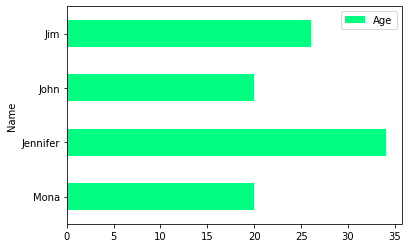

In [35]:
# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show();

## Part 1: Create a DataFrame from CSV file

Every 4 years, the soccer fans throughout the world celebrates a festival called “Fifa World Cup” and with that, everything seems to change in many countries. In this 3 part exercise, you'll be doing some `exploratory data analysis (EDA)` on the "FIFA 2018 World Cup Player" dataset using PySpark SQL which involve DataFrame operations, SQL queries and visualization.

In the first part, you'll load FIFA 2018 World Cup Players dataset (Fifa2018_dataset.csv) which is in CSV format into a PySpark's dataFrame and inspect the data using basic DataFrame operations.

Remember, you already have SparkSession spark and file_path variable (which is the path to the Fifa2018_dataset.csv file) available in your workspace.

- Create a PySpark DataFrame from file_path which is the path to the Fifa2018_dataset.csv file.
- Print the schema of the DataFrame.
- Print the first 10 observations.
- How many rows are in there in the DataFrame?

In [37]:
file_path = path+'Fifa2018_dataset.csv'

In [38]:
# Load the Dataframe
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


## Part 2: SQL Queries on DataFrame

The `fifa_df` DataFrame that we created has additional information about datatypes and names of columns associated with it. This additional information allows PySpark SQL to run SQL queries on DataFrame. SQL queries are concise and easy to run compared to DataFrame operations. But in order to apply SQL queries on DataFrame first, you need to create a temporary view of DataFrame as a table and then apply SQL queries on the created table (Running SQL Queries Programmatically).

In the second part, you'll create a temporary table of `fifa_df` DataFrame and run SQL queries to extract the 'Age' column of players from Germany.

You already have a SparkContext spark and fifa_df available in your workspace.

- Create temporary table fifa_df from fifa_df_table DataFrame.
- Construct a "query" to extract the "Age" column from Germany players.
- Apply the SQL "query" to the temporary view table and create a new DataFrame.
- Computes basic statistics of the created DataFrame.

In [41]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE `Nationality` == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293756|
|    min|               16|
|    max|               36|
+-------+-----------------+



## Part 3: Data visualization

Data visualization is important for `exploratory data analysis (EDA)`. PySpark DataFrame is a perfect for data visualization compared to RDDs because of it's inherent structure and schema.

In this third part, you'll create a `histogram` of the ages of all the players from Germany from the DataFrame that you created in the previous exercise. For this, you'll first convert the PySpark DataFrame into Pandas DataFrame and use matplotlib's `plot()` function to create a density plot of ages of all players from Germany.

Remember, you already have SparkSession spark, fifa_df_table temporary table and fifa_df_germany_age DataFrame available in your workspace.

- Convert fifa_df_germany_age to fifa_df_germany_age_pandas Pandas DataFrame.
- Generate a density plot of the 'Age' column from the fifa_df_germany_age_pandas Pandas DataFrame.

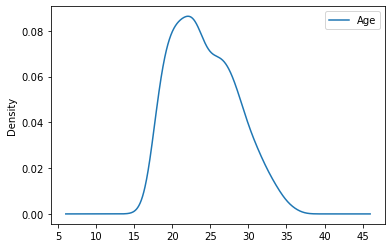

In [42]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show();

---
<a id='mlib'></a>

## Overview of PySpark MLlib

<img src="images/spark2_071.png" alt="" style="width: 800px;"/>

<img src="images/spark2_072.png" alt="" style="width: 800px;"/>

<img src="images/spark2_073.png" alt="" style="width: 800px;"/>

<img src="images/spark2_074.png" alt="" style="width: 800px;"/>

<img src="images/spark2_075.png" alt="" style="width: 800px;"/>

`pyspark.mllib` is the builtin library for `RDD-based API`.

## PySpark MLlib algorithms

Before using any Machine learning algorithms in PySpark shell, you'll have to import the submodules of `pyspark.mllib` library and then choose the appropriate class that is needed for a specific machine learning task.

In this simple exercise, you'll learn how to import the different submodules of pyspark.mllib along with the classes that are needed for performing Collaborative filtering, Classification and Clustering algorithms.

- Import pyspark.mllib recommendation submodule and Alternating Least Squares class.
- Import pyspark.mllib classification submodule and Logistic Regression with LBFGS class.
- Import pyspark.mllib clustering submodule and kmeans class.

In [43]:
# Import the library for ALS
from pyspark.mllib.recommendation import ALS

# Import the library for Logistic Regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# Import the library for Kmeans
from pyspark.mllib.clustering import KMeans

## Collaborative filtering

<img src="images/spark2_076.png" alt="" style="width: 800px;"/>

<img src="images/spark2_077.png" alt="" style="width: 800px;"/>

<img src="images/spark2_078.png" alt="" style="width: 800px;"/>

<img src="images/spark2_079.png" alt="" style="width: 800px;"/>

<img src="images/spark2_080.png" alt="" style="width: 800px;"/>

<img src="images/spark2_081.png" alt="" style="width: 800px;"/>

## 

In [ ]:
<img src="images/spark2_082.png" alt="" style="width: 800px;"/>

In [ ]:
---
<a id='intro'></a>